In [1]:
import os
import json
from glob import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

df = pd.read_csv('ga4_data.csv')

/var/folders/y_/1rycjnd92351p19bjvmvv_040000gn/T/ipykernel_2079/1681317252.py:11: DtypeWarning: Columns (1,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ga4_data.csv')


In [2]:
df = pd.read_csv('/Users/inkyunshin/🫥/sparta_관련/최종프로젝트/ga4_data.csv', index_col=False) 
df

/var/folders/y_/1rycjnd92351p19bjvmvv_040000gn/T/ipykernel_2079/2398982281.py:1: DtypeWarning: Columns (1,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/inkyunshin/🫥/sparta_관련/최종프로젝트/ga4_data.csv', index_col=False)


channelGrouping        fullVisitorId     visitId  visitNumber  \
0        Organic Search  4630727633458807481  1481298856            1   
1        Organic Search  6673067481519565231  1481293028            1   
2        Organic Search  3921724042853854812  1481303493            3   
3        Organic Search  3419302770445171884  1481349587            2   
4           Paid Search  3767379375556405972  1481317008            2   
...                 ...                  ...         ...          ...   
2464868  Organic Search  6349041488121511112  1488658451            1   
2464869  Organic Search  6349041488121511112  1488658451            1   
2464870  Organic Search  6349041488121511112  1488658451            1   
2464871        Referral   739262921799138361  1488660536            1   
2464872     Paid Search  3800755199520734229  1488656356            2   

              visitStartTime device_browser  totals_sessionQualityDim  \
0        2016-12-09 15:54:16         Safari                       NaN   
1        2016-12-09 14:17:08         Chrome                       NaN   
2        2016-12-09 17:11:33         Safari                       NaN   
3        2016-12-10 05:59:47         Chrome                       NaN   
4        2016-12-09 20:56:48         Chrome                       NaN   
...                      ...            ...                       ...   
2464868  2017-03-04 20:14:11         Safari                       NaN   
2464869  2017-03-04 20:14:11         Safari                       NaN   
2464870  2017-03-04 20:14:11         Safari                       NaN   
2464871  2017-03-04 20:48:56         Chrome                       NaN   
2464872  2017-03-04 19:39:16         Safari                       NaN   

         totals_newVisits  totals_totalTransactionRevenue  totals_bounces  \
0                     1.0                             NaN             1.0   
1                     1.0                             NaN             1.0   
2                     NaN                             NaN             1.0   
3                     NaN                             NaN             1.0   
4                     NaN                             NaN             1.0   
...                   ...                             ...             ...   
2464868               1.0                             NaN             NaN   
2464869               1.0                             NaN             NaN   
2464870               1.0                             NaN             NaN   
2464871               1.0                             NaN             NaN   
2464872               NaN                             NaN             NaN   

         ... hits_isExit                                hits_page_pageTitle  \
0        ...        True  Notebooks & Journals | Office | Google Merchan...   
1        ...        True               Drinkware | Google Merchandise Store   
2        ...        True  Shopping & Totes | Bags | Google Merchandise S...   
3        ...        True      Headgear | Apparel | Google Merchandise Store   
4        ...        True                               Store search results   
...      ...         ...                                                ...   
2464868  ...         NaN                               Store search results   
2464869  ...         NaN                                               Home   
2464870  ...        True              The Google Merchandise Store - Log In   
2464871  ...         NaN  YouTube | Shop by Brand | Google Merchandise S...   
2464872  ...         NaN         Women's Apparel | Google Merchandise Store   

        hits_page_searchKeyword hits_transaction_transactionRevenue  \
0                           NaN                                 NaN   
1                           NaN                                 NaN   
2                           NaN                                 NaN   
3                           NaN                                 NaN   
4                        

In [3]:
# 전처리 
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'])
df['totals_totalTransactionRevenue'] = df['totals_totalTransactionRevenue'].fillna(0)
df['hits_transaction_transactionRevenue'] = df['hits_transaction_transactionRevenue'].fillna(0)
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

def pad_with_zeros(string):
    """
    문자열의 길이가 19이 될 때까지 앞에 0을 추가하는 함수
    """
    # 문자열의 길이를 세기
    length = len(string)
    
    # 문자열의 길이가 20이 될 때까지 앞에 0을 추가
    while length < 19:
        string = '0' + string
        length += 1
    
    return string

df['fullVisitorId'] = df['fullVisitorId'].apply(pad_with_zeros)

df.visitStartTime = (df.visitStartTime - timedelta(hours=8))
# df = df.assign(month = df.visitStartTime.dt.strftime('%Y-%m'))
# df = df.assign(date = df.visitStartTime.dt.strftime('%m-%d'))
# df = df.assign(day_name = df.visitStartTime.dt.weekday)

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

channelGrouping        fullVisitorId     visitId  visitNumber  \
0  Organic Search  4630727633458807481  1481298856            1   
1  Organic Search  6673067481519565231  1481293028            1   
2  Organic Search  3921724042853854812  1481303493            3   
3  Organic Search  3419302770445171884  1481349587            2   
4     Paid Search  3767379375556405972  1481317008            2   

       visitStartTime device_browser  totals_sessionQualityDim  \
0 2016-12-09 07:54:16         Safari                       NaN   
1 2016-12-09 06:17:08         Chrome                       NaN   
2 2016-12-09 09:11:33         Safari                       NaN   
3 2016-12-09 21:59:47         Chrome                       NaN   
4 2016-12-09 12:56:48         Chrome                       NaN   

   totals_newVisits  totals_totalTransactionRevenue  totals_bounces  \
0               1.0                             0.0             1.0   
1               1.0                             0.0             1.0   
2               NaN                             0.0             1.0   
3               NaN                             0.0             1.0   
4               NaN                             0.0             1.0   

  trafficSource_referralPath trafficSource_campaign trafficSource_medium  \
0                        NaN              (not set)               (none)   
1                        NaN              (not set)               (none)   
2                        NaN              (not set)               (none)   
3                        NaN              (not set)               (none)   
4                        NaN              (not set)               (none)   

  trafficSource_keyword trafficSource_adContent trafficSource_isTrueDirect  \
0                   NaN                     NaN                        NaN   
1                   NaN                     NaN                        NaN   
2                   NaN                     NaN                       True   
3                   NaN                     NaN                       True   
4                   NaN                     NaN                       True   

   trafficSource_adwordsClickInfo_page trafficSource_adwordsClickInfo_slot  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  1.0                                 Top   

   hits_hitNumber  hits_hour  hits_minute hits_eventInfo_eventCategory  \
0               1          7           54                          NaN   
1               1          6           17                          NaN   
2               1          9           11                          NaN   
3               1         21           59                          NaN   
4               1         12           56                          NaN   

  hits_eventInfo_eventAction hits_eventInfo_eventLabel  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

   hits_eventInfo_eventValue hits_type             hits_referer hits_isExit  \
0                        NaN      PAGE  https://www.google.com/        True   
1                        NaN      PAGE  https://www.google.com/        True   
2                        NaN      PAGE                      NaN        True   
3                        NaN      PAGE  https://www.google.com/        True   
4                        NaN      PAGE                      NaN        True   

                                 hits_page_pageTitle hits_page_searchKeyword  \
0  Notebooks & Journals | Offic

In [5]:
# df.describe(include='all').T

In [6]:

# RFM -> VFM
# 방문빈도 : 구매했던 안했던 visitId count
# 구매건수 : revunue 찍힌 visitId 만 count
# 총매출 : Total Revenue

# 방문 빈도 계산 : Visit Count
# user_visit_Cnt = df.groupby('fullVisitorId')['visitId'].count().to_frame() : 잘못계산함
user_visit_Cnt = df.groupby('fullVisitorId')['visitId'].nunique().to_frame()

# 구매건수 계산 : Buy Count
# user_buy_total_Cnt = df[df['hits_transaction_transactionRevenue'] > 0].groupby('fullVisitorId')[['totals_totalTransactionRevenue']].count().sort_values('totals_totalTransactionRevenue') : 잠시 대기
# 구매건수 : 구매당 1씩
user_buy_total_Cnt = df[df['totals_totalTransactionRevenue'] > 0].groupby('fullVisitorId')['visitId'].nunique().to_frame()


# 총매출 : 
user_buy_total_Revenue = df[df['hits_transaction_transactionRevenue'] > 0].groupby('fullVisitorId')[['totals_totalTransactionRevenue']].agg('sum').sort_values('totals_totalTransactionRevenue')

# 평균매출
# user_buy_total_Revenue = df[df['hits_transaction_transactionRevenue'] > 0].groupby('fullVisitorId')[['totals_totalTransactionRevenue']].agg('mean').sort_values('totals_totalTransactionRevenue')

In [7]:
# # 동제님 공유 코드

# 구매고객 = df[df['totals_totalTransactionRevenue'] != 0]['fullVisitorId'].unique()
# df2 = df[df['fullVisitorId'].isin(구매고객)]

# user_visit_Cnt = df2.groupby('fullVisitorId')['visitId'].count().to_frame()
# user_buy_total_Cnt = pd.DataFrame(df2[df2['totals_totalTransactionRevenue'] != 0].groupby('fullVisitorId')['visitId'].count())
# user_buy_total_Revenue = df2[df2['hits_transaction_transactionRevenue'] > 0].groupby('fullVisitorId')[['totals_totalTransactionRevenue']].agg('sum')

# vvip_VFM = user_visit_Cnt.merge(user_buy_total_Cnt, how='inner', on='fullVisitorId') # V : visit Count
# vvip_VFM = vvip_VFM.merge(user_buy_total_Revenue, how='inner', on='fullVisitorId') 

# vvip_VFM = vvip_VFM.rename(columns={'visitId_x' : 'visit_Cnt'})
# vvip_VFM = vvip_VFM.rename(columns={'visitId_y' : 'buy_Cnt'})
# vvip_VFM = vvip_VFM.rename(columns={'totals_totalTransactionRevenue' : 'total_Revenue'})

# df_VFM = vvip_VFM.copy()
# vvip_VFM

In [8]:
df_distinct = df['fullVisitorId'].drop_duplicates()
df_distinct = pd.DataFrame(df_distinct)

In [9]:
# 구매한 적이 있는 9463명
# df 고객 방문 빈도 구하기
df_V = df_distinct.merge(user_visit_Cnt, how='inner', on='fullVisitorId') # V : visit Count
df_V = df_V.rename(columns={'visitId' : 'visit_Cnt'})

# df 고객 총 구매 건수 구하기
df_VF = df_V.merge(user_buy_total_Cnt, how='inner', on='fullVisitorId') 
# df_VF = df_VF.rename(columns={'totals_totalTransactionRevenue' : 'buy_Cnt'})
df_VF = df_VF.rename(columns={'visitId' : 'buy_Cnt'})

# df 고객 총매출 구하기
df_VFM = df_VF.merge(user_buy_total_Revenue, how='inner', on='fullVisitorId')
df_VFM = df_VFM.rename(columns={'totals_totalTransactionRevenue' : 'total_Revenue'})
df_VFM

fullVisitorId  visit_Cnt  buy_Cnt  total_Revenue
0     0005339642194263188         16        1          15.47
1     1553504908601719051          4        1          15.47
2     6966023444510052421          2        1          64.99
3     5370842366618648178          5        1          59.36
4     6924624858911861429          3        1          25.99
...                   ...        ...      ...            ...
9416  3232963301544561128          1        1          22.69
9417  5414121324420751471          1        1          33.19
9418  0633420224856417225          1        1          25.99
9419  7999476853921506700          1        1         138.85
9420  6599797229931004781          1        1          30.18

[9421 rows x 4 columns]

In [10]:
df_VFM

fullVisitorId  visit_Cnt  buy_Cnt  total_Revenue
0     0005339642194263188         16        1          15.47
1     1553504908601719051          4        1          15.47
2     6966023444510052421          2        1          64.99
3     5370842366618648178          5        1          59.36
4     6924624858911861429          3        1          25.99
...                   ...        ...      ...            ...
9416  3232963301544561128          1        1          22.69
9417  5414121324420751471          1        1          33.19
9418  0633420224856417225          1        1          25.99
9419  7999476853921506700          1        1         138.85
9420  6599797229931004781          1        1          30.18

[9421 rows x 4 columns]

In [11]:
# df_VFM[df_VFM['visit_Cnt'] != df_VFM['buy_Cnt']]

In [12]:
# 전체 고객 263466명 version
# # RFM -> VFM
# # 방문빈도 : 구매했던 안했던 visitId count
# # 구매건수 : revunue 찍힌 visitId 만 count
# # 총매출 : Total Revenue

# # 방문 빈도 계산 : Visit Count
# user_visit_Cnt = df.groupby('fullVisitorId')['visitId'].count().to_frame()

# # 구매건수 계산 : Buy Count
# user_buy_total_Cnt = df[df['hits_transaction_transactionRevenue'] > 0].groupby('fullVisitorId')[['totals_totalTransactionRevenue']].count().sort_values('totals_totalTransactionRevenue')

# # 총매출 : 
# user_buy_total_Revenue = df[df['hits_transaction_transactionRevenue'] > 0].groupby('fullVisitorId')[['totals_totalTransactionRevenue']].agg('sum').sort_values('totals_totalTransactionRevenue')

# # vvip 고객 총 구매 건수 구하기
# vvip_VF = user_visit_Cnt.merge(user_buy_total_Cnt, how='left', on='fullVisitorId') 
# vvip_VF = vvip_VF.rename(columns={'visitId' : 'visit_Cnt'})
# vvip_VF = vvip_VF.rename(columns={'totals_totalTransactionRevenue' : 'buy_Cnt'})

# # vvip 고객 총매출 구하기
# vvip_VFM = vvip_VF.merge(user_buy_total_Revenue, how='left', on='fullVisitorId')
# vvip_VFM = vvip_VFM.rename(columns={'totals_totalTransactionRevenue' : 'total_Revenue'})

# #매출이 없고 구매 빈도가 없는 고객을 0으로 치환
# vvip_VFM['buy_Cnt'] = vvip_VFM['buy_Cnt'].fillna(0).astype(int)
# vvip_VFM['total_Revenue'] = vvip_VFM['total_Revenue'].fillna(0).astype(int)

# df_VFM = vvip_VFM

In [13]:
df_VFM_cluster = df_VFM.iloc[:, 1:4]

In [14]:
df_VFM2 = df_VFM.copy()
df_VFM2

fullVisitorId  visit_Cnt  buy_Cnt  total_Revenue
0     0005339642194263188         16        1          15.47
1     1553504908601719051          4        1          15.47
2     6966023444510052421          2        1          64.99
3     5370842366618648178          5        1          59.36
4     6924624858911861429          3        1          25.99
...                   ...        ...      ...            ...
9416  3232963301544561128          1        1          22.69
9417  5414121324420751471          1        1          33.19
9418  0633420224856417225          1        1          25.99
9419  7999476853921506700          1        1         138.85
9420  6599797229931004781          1        1          30.18

[9421 rows x 4 columns]

In [15]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_VFM_cluster)

pca_transformed = pd.DataFrame(pca_transformed, columns=(['PCA_x', 'PCA_y']))

pca_transformed_copy = pca_transformed.copy()

pca_transformed

PCA_x      PCA_y
0    -203.248251  12.623608
1    -203.260328   0.634233
2    -153.742367  -1.413957
3    -159.369344   1.589067
4    -192.741340  -0.375495
...          ...        ...
9416 -196.043352  -2.370394
9417 -185.543357  -2.380988
9418 -192.743353  -2.373724
9419  -79.883411  -2.487589
9420 -188.553355  -2.377951

[9421 rows x 2 columns]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

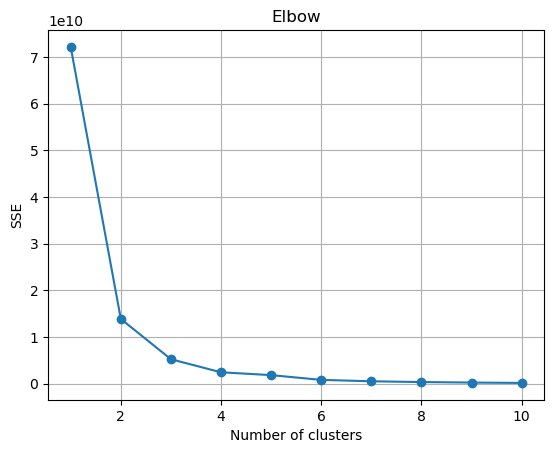

In [16]:
from sklearn.cluster import KMeans

# 최적의 클러스터 확인 : 엘보우 플랏
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_transformed)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(visible=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 2개 : 실루엣 스코어 0.9986772887597417


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 3개 : 실루엣 스코어 0.9957106401335056


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 4개 : 실루엣 스코어 0.9769135317263388


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 5개 : 실루엣 스코어 0.9768360951617394


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 6개 : 실루엣 스코어 0.9468377296166154


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 7개 : 실루엣 스코어 0.8708929597785733


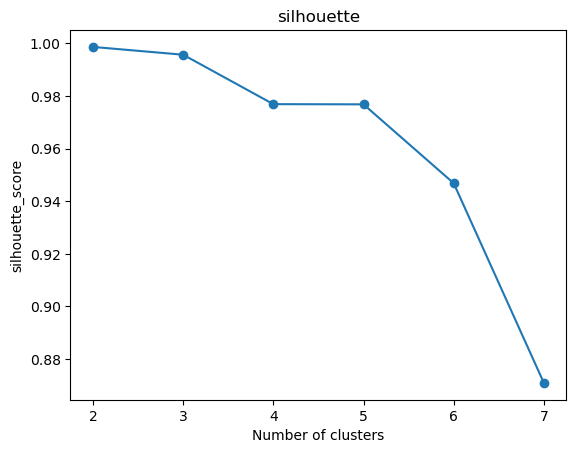

In [17]:
# 최적의 클러스터 확인 : 실루엣 계수
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_transformed)
    score = silhouette_score(pca_transformed, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'클러스터 {k}개 : 실루엣 스코어 {score}')

# 실루엣 분석 그래프 그리기
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


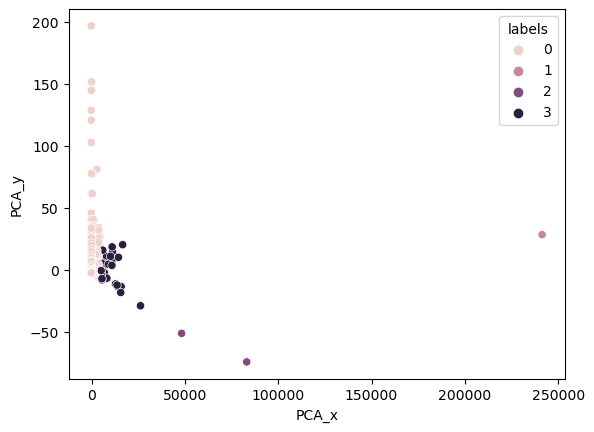

In [18]:
# 클러스터링 함수
from sklearn.cluster import KMeans
import seaborn as sns

def clustering_1(cluster, data):
        # K means clustering 진행
        km = KMeans(n_clusters=cluster)
        km.fit(data)
        # 클러스터 라벨 컬럼 생성
        data['labels'] = km.labels_
        
        # scatter 시각화
        sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue='labels', data=data)
        
clustering_1(4, pca_transformed)

In [19]:
# 고객 중에 구매 기록이 있는 9463명 라벨 부여
# fullvisitorid가 있는 테이블에 라벨 부여 (다음 작업은 원래 df 에 라벨을 옮기기)
concat_labels = pd.concat([df_VFM, pca_transformed], axis=1)
concat_labels

fullVisitorId  visit_Cnt  buy_Cnt  total_Revenue       PCA_x  \
0     0005339642194263188         16        1          15.47 -203.248251   
1     1553504908601719051          4        1          15.47 -203.260328   
2     6966023444510052421          2        1          64.99 -153.742367   
3     5370842366618648178          5        1          59.36 -159.369344   
4     6924624858911861429          3        1          25.99 -192.741340   
...                   ...        ...      ...            ...         ...   
9416  3232963301544561128          1        1          22.69 -196.043352   
9417  5414121324420751471          1        1          33.19 -185.543357   
9418  0633420224856417225          1        1          25.99 -192.743353   
9419  7999476853921506700          1        1         138.85  -79.883411   
9420  6599797229931004781          1        1          30.18 -188.553355   

          PCA_y  labels  
0     12.623608       0  
1      0.634233       0  
2     -1.413957       0  
3      1.589067       0  
4     -0.375495       0  
...         ...     ...  
9416  -2.370394       0  
9417  -2.380988       0  
9418  -2.373724       0  
9419  -2.487589       0  
9420  -2.377951       0  

[9421 rows x 7 columns]

In [20]:
concat_labels.groupby('labels').count()

fullVisitorId  visit_Cnt  buy_Cnt  total_Revenue  PCA_x  PCA_y
labels                                                                
0                9391       9391     9391           9391   9391   9391
1                   1          1        1              1      1      1
2                   2          2        2              2      2      2
3                  27         27       27             27     27     27

In [21]:
# df 기존 테이블에 라벨 부여
df_labels = pd.merge(left=df, right=concat_labels, how='left', left_on='fullVisitorId', right_on='fullVisitorId')
df_labels

channelGrouping        fullVisitorId     visitId  visitNumber  \
0        Organic Search  4630727633458807481  1481298856            1   
1        Organic Search  6673067481519565231  1481293028            1   
2        Organic Search  3921724042853854812  1481303493            3   
3        Organic Search  3419302770445171884  1481349587            2   
4           Paid Search  3767379375556405972  1481317008            2   
...                 ...                  ...         ...          ...   
2464868  Organic Search  6349041488121511112  1488658451            1   
2464869  Organic Search  6349041488121511112  1488658451            1   
2464870  Organic Search  6349041488121511112  1488658451            1   
2464871        Referral  0739262921799138361  1488660536            1   
2464872     Paid Search  3800755199520734229  1488656356            2   

             visitStartTime device_browser  totals_sessionQualityDim  \
0       2016-12-09 07:54:16         Safari                       NaN   
1       2016-12-09 06:17:08         Chrome                       NaN   
2       2016-12-09 09:11:33         Safari                       NaN   
3       2016-12-09 21:59:47         Chrome                       NaN   
4       2016-12-09 12:56:48         Chrome                       NaN   
...                     ...            ...                       ...   
2464868 2017-03-04 12:14:11         Safari                       NaN   
2464869 2017-03-04 12:14:11         Safari                       NaN   
2464870 2017-03-04 12:14:11         Safari                       NaN   
2464871 2017-03-04 12:48:56         Chrome                       NaN   
2464872 2017-03-04 11:39:16         Safari                       NaN   

         totals_newVisits  totals_totalTransactionRevenue  totals_bounces  \
0                     1.0                             0.0             1.0   
1                     1.0                             0.0             1.0   
2                     NaN                             0.0             1.0   
3                     NaN                             0.0             1.0   
4                     NaN                             0.0             1.0   
...                   ...                             ...             ...   
2464868               1.0                             0.0             NaN   
2464869               1.0                             0.0             NaN   
2464870               1.0                             0.0             NaN   
2464871               1.0                             0.0             NaN   
2464872               NaN                             0.0             NaN   

        trafficSource_referralPath trafficSource_campaign  \
0                              NaN              (not set)   
1                              NaN              (not set)   
2                              NaN              (not set)   
3                              NaN              (not set)   
4                              NaN              (not set)   
...                            ...                    ...   
2464868                        NaN              (not set)   
2464869                        NaN              (not set)   
2464870                        NaN              (not set)   
2464871                          /              (not set)   
2464872                        NaN       AW - Accessories   

        trafficSource_medium     trafficSource_keyword  \
0                     (none)                       NaN   
1                     (none)                       NaN   
2                     (none)                       NaN   
3                     (none)                       NaN   
4                     (none)                       NaN   
...                      ...                       ...   
2464868              organic            (not provided)   
2464869              organic            (not provided)   
2464870              organic            (not provided)   
2464871               (none)

In [22]:
df_labels.groupby('labels')['fullVisitorId'].count()

labels
0.0    605899
1.0      4967
2.0      1166
3.0     10917
Name: fullVisitorId, dtype: int64

In [23]:
df_labels['labels'] = df_labels['labels'].apply(lambda x: -1 if x == 1 else x -1 if x == 2 else 1 if x == 3 else x)
# (df_labels[df_labels['labels'] == 1]) = -1
# (df_labels[df_labels['labels'] == 2]) = -1
# (df_labels[df_labels['labels'] == 3]) = 1

In [24]:
df_labels.groupby(['labels']).agg({
        'visit_Cnt': 'mean',
        'buy_Cnt': 'mean',
        'total_Revenue': ['mean', 'count']
}).round(0)

visit_Cnt buy_Cnt total_Revenue        
            mean    mean          mean   count
labels                                        
-1.0       275.0    16.0      241619.0    4967
 0.0         7.0     1.0         316.0  605899
 1.0        18.0     7.0       16081.0   12083

<Axes: xlabel='Metric', ylabel='Value'>

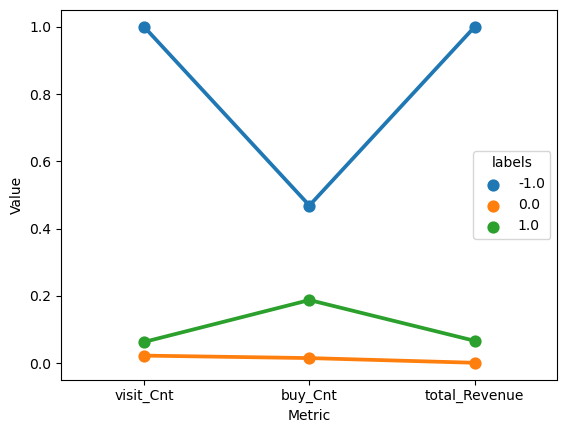

In [25]:
# 스네이크 플롯 시각화 할때만 정규화하기 (잘보이기 위해서)
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체를 생성합니다.
minmax_scaler = MinMaxScaler()

# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.

df_labels_copy = df_labels[['fullVisitorId','buy_Cnt','visit_Cnt', 'total_Revenue', 'labels']]

minmax = minmax_scaler.fit_transform(df_labels_copy)
minmax = pd.DataFrame(minmax, index=df_labels_copy.index, columns=df_labels_copy.columns)
minmax['labels'] = df_labels_copy['labels']

# Melt data into long format
df_melt = pd.melt(minmax.reset_index(), 
                        id_vars=['fullVisitorId', 'labels'],
                        value_vars=['visit_Cnt', 'buy_Cnt', 'total_Revenue'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='labels')

In [26]:
df_labels[df_labels.labels == -1].groupby('fullVisitorId').nunique()

channelGrouping  visitId  visitNumber  visitStartTime  \
fullVisitorId                                                                
1957458976293878100                3      275          275             275   

                     device_browser  totals_sessionQualityDim  \
fullVisitorId                                                   
1957458976293878100               1                         3   

                     totals_newVisits  totals_totalTransactionRevenue  \
fullVisitorId                                                           
1957458976293878100                 0                              17   

                     totals_bounces  trafficSource_referralPath  \
fullVisitorId                                                     
1957458976293878100               1                           0   

                     trafficSource_campaign  trafficSource_medium  \
fullVisitorId                                                       
1957458976293878100                       1                     3   

                     trafficSource_keyword  trafficSource_adContent  \
fullVisitorId                                                         
1957458976293878100                      1                        0   

                     trafficSource_isTrueDirect  \
fullVisitorId                                     
1957458976293878100                           1   

                     trafficSource_adwordsClickInfo_page  \
fullVisitorId                                              
1957458976293878100                                    0   

                     trafficSource_adwordsClickInfo_slot  hits_hitNumber  \
fullVisitorId                                                              
1957458976293878100                                    0             227   

                     hits_hour  hits_minute  hits_eventInfo_eventCategory  \
fullVisitorId                                                               
1957458976293878100         15           60                             1   

                     hits_eventInfo_eventAction  hits_eventInfo_eventLabel  \
fullVisitorId                                                                
1957458976293878100                           4                        102   

                     hits_eventInfo_eventValue  hits_type  hits_referer  \
fullVisitorId                                                             
1957458976293878100                          0          2             4   

                     hits_isExit  hits_page_pageTitle  \
fullVisitorId                                           
1957458976293878100            1                  452   

                     hits_page_searchKeyword  \
fullVisitorId                                  
1957458976293878100                        0   

                     hits_transaction_transactionRevenue  \
fullVisitorId                                              
1957458976293878100                                   23   

                     hits_transaction_transactionTax  \
fullVisitorId                                          
1957458976293878100                                0   

                     hits_transaction_transactionShipping  \
fullVisitorId                                               
1957458976293878100                                    11   

                     hits_eCommerceAction_action_type  \
fullVisitorId                                           
1957458976293878100                                 7   

                     hits_eCommerceAction_step  hits_social_socialNetwork  \
fullVisitorId                                                               
1957458976293878100                          3                          1   

                     hits_social_hasSocialSourceReferral  visit_Cnt  buy_Cnt  \
fullVisitorId                                                                  
1957458976293878100                                    1          1       

In [27]:
df_labels.groupby('labels')['fullVisitorId'].count()

labels
-1.0      4967
 0.0    605899
 1.0     12083
Name: fullVisitorId, dtype: int64

In [28]:
# df_labels.to_csv('ga4_data_Addcluster.csv',index=False)

KeyboardInterrupt: 

In [ ]:
df_labels.describe(include='all').T

count  unique  \
channelGrouping                         2464873       8   
fullVisitorId                           2464873  250143   
visitId                               2464873.0     NaN   
visitNumber                           2464873.0     NaN   
visitStartTime                          2464873     NaN   
device_browser                          2464873      33   
totals_sessionQualityDim               172149.0     NaN   
totals_newVisits                      1473891.0     NaN   
totals_totalTransactionRevenue        2464873.0     NaN   
totals_bounces                         127785.0     NaN   
trafficSource_referralPath               810435     976   
trafficSource_campaign                  2464873       8   
trafficSource_medium                    2464873       7   
trafficSource_keyword                    697175     408   
trafficSource_adContent                   45409      39   
trafficSource_isTrueDirect              1087228       1   
trafficSource_adwordsClickInfo_page    146856.0     NaN   
trafficSource_adwordsClickInfo_slot      146856       2   
hits_hitNumber                        2464873.0     NaN   
hits_hour                             2464873.0     NaN   
hits_minute                           2464873.0     NaN   
hits_eventInfo_eventCategory             429419       2   
hits_eventInfo_eventAction               429419       6   
hits_eventInfo_eventLabel                239357     490   
hits_eventInfo_eventValue                   0.0     NaN   
hits_type                               2464873       2   
hits_referer                             372114   11193   
hits_isExit                              362063       1   
hits_page_pageTitle                     2464449     925   
hits_page_searchKeyword                     254       9   
hits_transaction_transactionRevenue   2464873.0     NaN   
hits_transaction_transactionTax          7970.0     NaN   
hits_transaction_transactionShipping    11230.0     NaN   
hits_eCommerceAction_action_type      2464873.0     NaN   
hits_eCommerceAction_step             2464873.0     NaN   
hits_social_socialNetwork               2464873      14   
hits_social_hasSocialSourceReferral     2464873       2   
visit_Cnt                              622949.0     NaN   
buy_Cnt                                622949.0     NaN   
total_Revenue                          622949.0     NaN   
PCA_x                                  622949.0     NaN   
PCA_y                                  622949.0     NaN   
labels                                 622949.0     NaN   

                                                                                    top  \
channelGrouping                                                          Organic Search   
fullVisitorId                                                       1957458976293878100   
visitId                                                                             NaN   
visitNumber                                                                         NaN   
visitStartTime                                                                      NaN   
device_browser                                                                   Chrome   
totals_sessionQualityDim                                                            NaN   
totals_newVisits                                                                    NaN   
totals_totalTransactionRevenue                                                      NaN   
totals_bounces                                                                      NaN   
trafficSource_referralPath                                                            /   
trafficSource_campaign                                                        (not set)   
trafficSource_medium                                                             (none)   
trafficSource_keyword                                                    (not provided)   
trafficSource_adContent                                   Google Merchandise Col

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/y_/1rycjnd92351p19bjvmvv_040000gn/T/ipykernel_3860/497021609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels'] = km.labels_


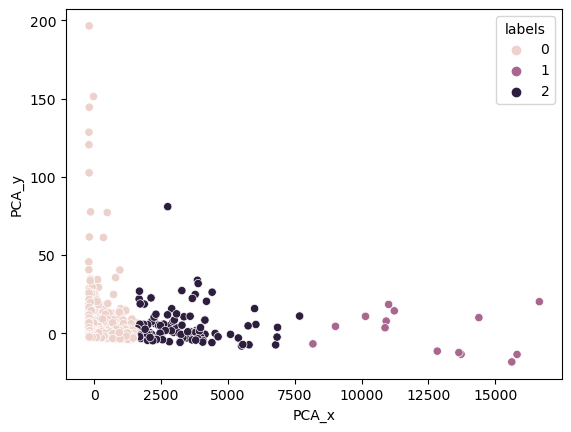

In [ ]:
# 이상치 제거 후 클러스터링
under_pcax_25000 = pca_transformed_copy[pca_transformed_copy['PCA_x'] < 25000]
clustering_1(3, under_pcax_25000)

In [ ]:
# 이상치 idx
oulier_idx = pca_transformed_copy[pca_transformed_copy['PCA_x'] > 25000].index
oulier_idx

Index([90, 427, 5166, 9114], dtype='int64')

In [ ]:
under_pcax_25000.groupby('labels')[['PCA_x', 'PCA_y']].agg('min')

PCA_x      PCA_y
labels                        
0       -217.533341  -3.968013
1       8178.586486 -18.324147
2       1601.912857  -8.128553

In [ ]:
# # under_pcax_25000 -> 0 라벨 제외 후 다시 클러스터링
# under_pcax_25000_label_zero_drop = under_pcax_25000[under_pcax_25000['labels'] > 0]
# # under_pcax_25000_label_zero_drop
# clustering_1(2, under_pcax_25000_label_zero_drop)

In [ ]:
# 이상치 제거 df
df_VFM[df_VFM.index.isin(under_pcax_25000_label_zero_drop.index)]

NameError: name 'under_pcax_25000_label_zero_drop' is not defined

In [ ]:
concat_label = pd.concat([df_VFM[df_VFM.index.isin(under_pcax_25000_label_zero_drop.index)], under_pcax_25000_label_zero_drop], axis=1)
concat_label

fullVisitorId  visit_Cnt  buy_Cnt  total_Revenue         PCA_x  \
6     7813149961404844386        972       35        2940.89   2740.419317   
7     1956307607572137989        927        9       10793.23  10590.361072   
9     6010250598436085923        876        6        3839.77   3637.238684   
21    7990135994432965391        178        2        2498.95   2282.980711   
58     372706149688864468        185        8        4353.81   4137.621773   
...                   ...        ...      ...            ...           ...   
8249  7117790713019441087         52        2        2305.64   2087.235662   
8398  4178948793864037103        168        4        5775.16   5558.364027   
8765  5617770153245303309        109        2        5314.00   5096.134890   
9395  6913633170731491634          7        1        1940.13   1720.912942   
9413  7965265156545901045         10        1        4849.60   4629.881667   

           PCA_y  labels  
6     854.201247       1  
7     654.999844       0  
9     740.432750       1  
21     68.864800       1  
58     39.499243       1  
...          ...     ...  
8249  -53.316187       1  
8398   -5.407215       1  
8765  -55.356763       1  
9395  -91.140225       1  
9413 -145.229294       1  

[120 rows x 7 columns]

In [ ]:
concat_label[concat_label.labels.isna()]

Empty DataFrame
Columns: [fullVisitorId, visit_Cnt, buy_Cnt, total_Revenue, PCA_x, PCA_y, labels]
Index: []

In [ ]:
import plotly.express as px

fig = px.scatter_3d(concat_label, 
                  x='visit_Cnt', y='buy_Cnt', z='total_Revenue',
                  color="labels")
fig.show()

In [ ]:
import plotly.express as px

pd.DataFrame.iteritems = pd.DataFrame.items
# px.scatter(concat_label, x='PCA_x', y='PCA_y', color='labels', col)
fig = px.scatter_matrix(concat_label, 
                  dimensions=['PCA_x','PCA_y'],
                  color="labels")
fig.show()

In [ ]:
df_vvip = df[df['fullVisitorId'].isin(concat_label['fullVisitorId'])]
concat_label_vvip = df_vvip.merge(concat_label[['fullVisitorId','labels']], how='inner', on='fullVisitorId')
concat_label_vvip

channelGrouping        fullVisitorId     visitId  visitNumber  \
0              Direct  7813149961404844386  1481302820           21   
1              Direct  7813149961404844386  1481311109           24   
2              Direct  7813149961404844386  1490820408          103   
3              Direct  7813149961404844386  1490820408          103   
4              Direct  7813149961404844386  1485535638           51   
...               ...                  ...         ...          ...   
36111          Direct  7965265156545901045  1480524350            4   
36112          Direct  7965265156545901045  1480524350            4   
36113          Direct  7965265156545901045  1480524350            4   
36114          Direct  7965265156545901045  1480520197            3   
36115          Direct  7965265156545901045  1480520197            3   

            visitStartTime device_browser  totals_sessionQualityDim  \
0      2016-12-09 17:00:20         Chrome                       NaN   
1      2016-12-09 19:18:29         Chrome                       NaN   
2      2017-03-29 20:46:48         Chrome                       NaN   
3      2017-03-29 20:46:48         Chrome                       NaN   
4      2017-01-27 16:47:18         Chrome                       NaN   
...                    ...            ...                       ...   
36111  2016-11-30 16:45:50         Chrome                       NaN   
36112  2016-11-30 16:45:50         Chrome                       NaN   
36113  2016-11-30 16:45:50         Chrome                       NaN   
36114  2016-11-30 15:36:37         Chrome                       NaN   
36115  2016-11-30 15:36:37         Chrome                       NaN   

       totals_newVisits  totals_totalTransactionRevenue  totals_bounces  \
0                   NaN                             NaN             NaN   
1                   NaN                             NaN             NaN   
2                   NaN                           45.99             NaN   
3                   NaN                           45.99             NaN   
4                   NaN                           49.79             NaN   
...                 ...                             ...             ...   
36111               NaN                         4849.60             NaN   
36112               NaN                         4849.60             NaN   
36113               NaN                         4849.60             NaN   
36114               NaN                             NaN             NaN   
36115               NaN                             NaN             NaN   

      trafficSource_referralPath trafficSource_campaign trafficSource_medium  \
0                            NaN              (not set)               (none)   
1                            NaN              (not set)               (none)   
2                            NaN              (not set)               (none)   
3                            NaN              (not set)               (none)   
4                            NaN              (not set)               (none)   
...                          ...                    ...                  ...   
36111                        NaN              (not set)               (none)   
36112                        NaN              (not set)               (none)   
36113                        NaN              (not set)               (none)   
36114                        NaN              (not set)               (none)   
36115                        NaN              (not set)               (none)   

      trafficSource_keyword trafficSource_adContent  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   
...                     ...                     ...   
36111                   NaN                     NaN  

In [ ]:
concat_label_vvip.columns

Index(['channelGrouping', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'totals_sessionQualityDim',
       'totals_newVisits', 'totals_totalTransactionRevenue', 'totals_bounces',
       'trafficSource_referralPath', 'trafficSource_campaign',
       'trafficSource_medium', 'trafficSource_keyword',
       'trafficSource_adContent', 'trafficSource_isTrueDirect',
       'trafficSource_adwordsClickInfo_page',
       'trafficSource_adwordsClickInfo_slot', 'hits_hitNumber', 'hits_hour',
       'hits_minute', 'hits_eventInfo_eventCategory',
       'hits_eventInfo_eventAction', 'hits_eventInfo_eventLabel',
       'hits_eventInfo_eventValue', 'hits_type', 'hits_referer', 'hits_isExit',
       'hits_page_pageTitle', 'hits_page_searchKeyword',
       'hits_transaction_transactionRevenue',
       'hits_transaction_transactionTax',
       'hits_transaction_transactionShipping',
       'hits_eCommerceAction_action_type', 'hits_eCommerceAction_step',
       'hit

In [ ]:
col = [
      'visitStartTime', 'device_browser','totals_totalTransactionRevenue',
 'trafficSource_isTrueDirect',
       'hits_eventInfo_eventAction',
       'hits_transaction_transactionRevenue',
       'hits_eCommerceAction_action_type', 'hits_eCommerceAction_step', 'labels'
]

fig = plt.figure(figsize=(20,20))
fig = px.scatter_matrix(concat_label_vvip[col], color='labels')
fig.show()

<Figure size 2000x2000 with 0 Axes>